In [171]:
import numpy as np
jax_fast_result = np.load('../bayes_implicit_solvent/continuous_parameter_experiments/cyclohexane_and_friends.npz')

In [172]:
mol_names = ['ethane', 'benzene', 'cyclopentane', 'ethylene', 'methane', 'cyclopropane', 'cyclohexane']

In [173]:
mh_result = jax_fast_result['traj']

In [174]:
len(mh_result)

3

In [175]:
traj = mh_result[0]
log_prob_trace = mh_result[1]

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

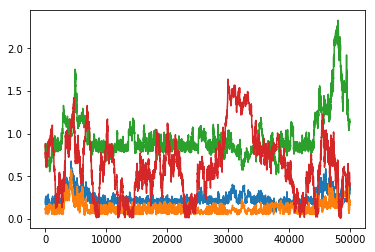

In [177]:
plt.plot(traj)

(array([  826., 18480., 17238.,  6505.,  3890.,  1935.,   794.,   234.,
           69.,    30.]),
 array([0.07908215, 0.13894245, 0.19880276, 0.25866306, 0.31852336,
        0.37838367, 0.43824397, 0.49810427, 0.55796458, 0.61782488,
        0.67768518]),
 <a list of 10 Patch objects>)

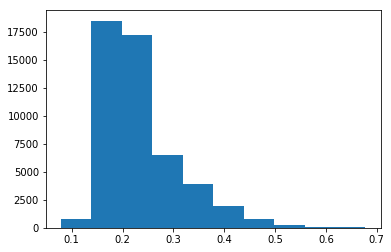

In [178]:
plt.hist(traj[:,0])

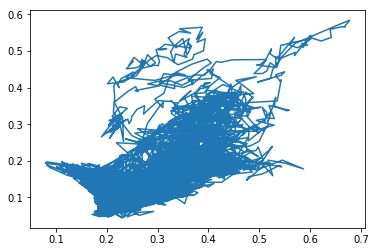

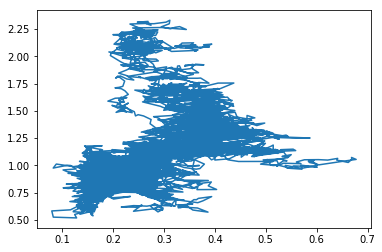

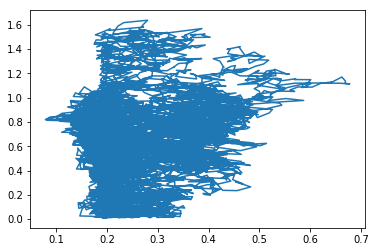

In [179]:
plt.plot(traj[:,0], traj[:,1])
plt.figure()
plt.plot(traj[:,0], traj[:,2])
plt.figure()
plt.plot(traj[:,0], traj[:,3])

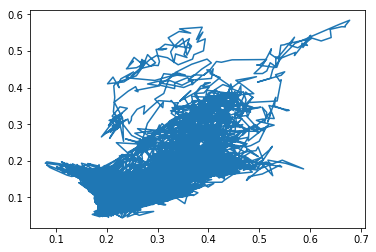

In [180]:
plt.plot(traj[2000:,0], traj[2000:,1])

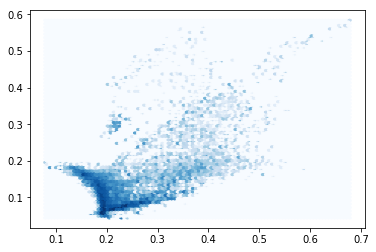

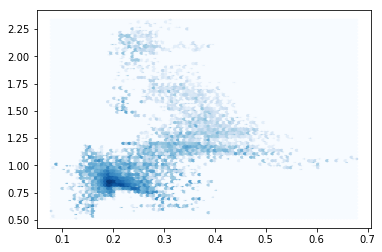

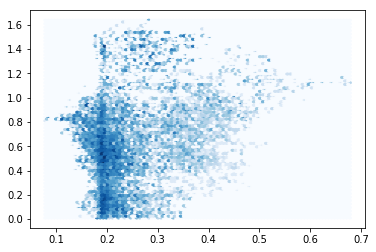

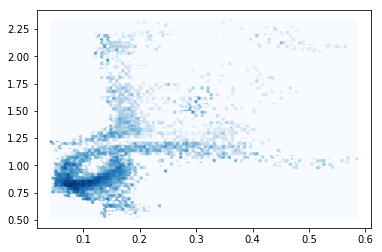

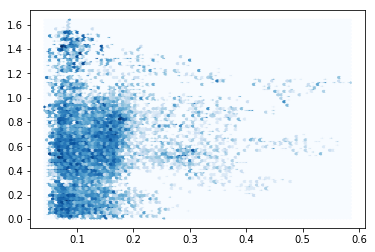

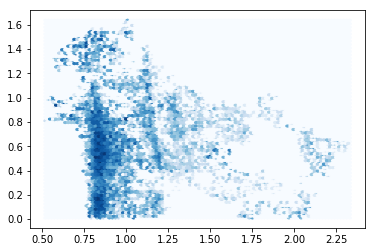

In [184]:
plt.hexbin(traj[2000:,0], traj[2000:,1], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,2], traj[2000:,3], cmap='Blues', bins='log');

In [182]:
from bayes_implicit_solvent.continuous_parameter_experiments.cyclohexane import get_predictions

In [183]:
prediction_traj = np.array([get_predictions(theta) for theta in traj[::10]])

In [210]:
prediction_traj[0].shape

(4,)

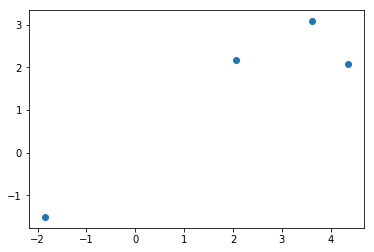

In [203]:
expt_means = jax_fast_result['expt_means']
expt_uncs = jax_fast_result['expt_uncs']
plt.scatter(prediction_traj[0], expt_means)

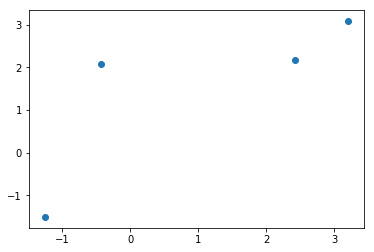

In [186]:
plt.scatter(prediction_traj[-1], expt_means)

In [187]:
def rmse(x, y):
    squared_errors = (x - y)**2
    mean_squared_errors = np.mean(squared_errors)
    root_mean_squared_errors = np.sqrt(mean_squared_errors)
    return root_mean_squared_errors

In [188]:
rmses = np.array([rmse(snapshot, expt_means) for snapshot in prediction_traj])

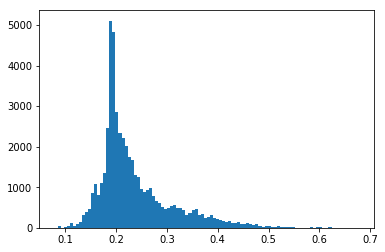

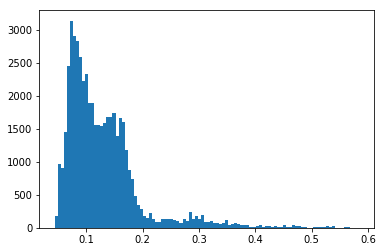

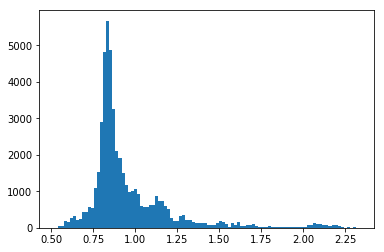

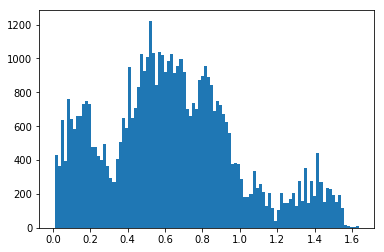

In [213]:
for i in range(len(traj[0])):
    plt.figure()
    plt.hist(np.array(traj)[:,i], bins=100);

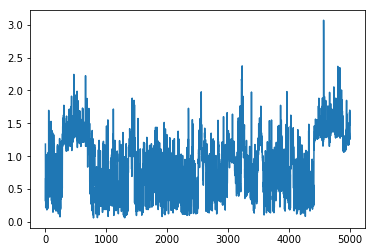

In [189]:
plt.plot(rmses)

In [190]:
prediction_traj[np.argmax(rmses)]

array([ 6.4113407 , -0.47208786,  6.638676  , -1.6545191 ], dtype=float32)

In [191]:
prediction_traj[np.argmin(rmses)]

array([ 3.017006 ,  2.0155306,  2.170087 , -1.6004667], dtype=float32)

In [192]:
expt_means

array([ 3.08868239,  2.07599964,  2.16038987, -1.51902413])

In [193]:
traj[np.argmax(rmses)]

array([0.46378331, 0.27744259, 1.13584082, 1.20899232])

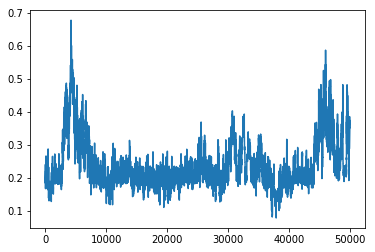

In [194]:
plt.plot(traj[:,0])

(0, 4)

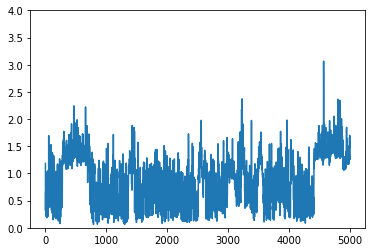

In [195]:
plt.plot(rmses)
plt.ylim(0,4)

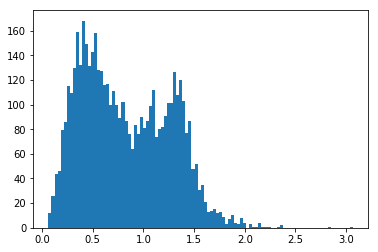

In [198]:
plt.hist(rmses, bins=100);

In [199]:
np.mean(rmses > 4)

0.0

In [200]:
min(rmses)

0.062291565522574206

In [205]:
x = np.linspace(np.min(prediction_traj), np.max(prediction_traj))

from scipy.stats import t as student_t
ys = [student_t.pdf(x, loc=expt_means[i], scale=expt_uncs[i], df=7) for i in range(len(expt_means))]

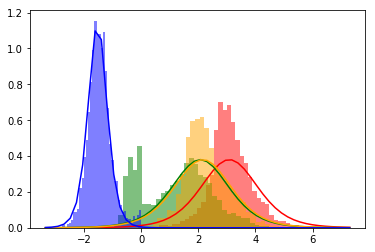

In [208]:
colors = ['red', 'green', 'orange', 'blue']

for i in range(len(expt_means)):
    plt.hist(prediction_traj[:,i], bins=50, density=True, color=colors[i], alpha=0.5);
    plt.plot(x, ys[i], c=colors[i])

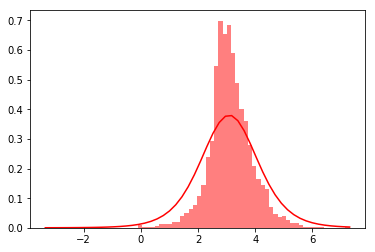

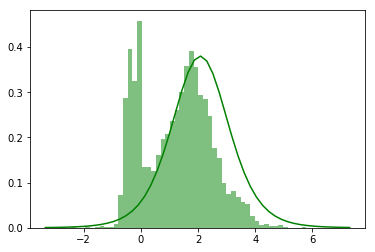

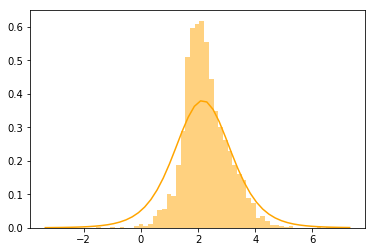

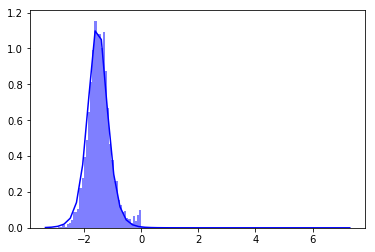

In [209]:
for i in range(len(expt_means)):
    plt.figure()
    plt.hist(prediction_traj[:,i], bins=50, density=True, color=colors[i], alpha=0.5);
    plt.plot(x, ys[i], c=colors[i])